In [3]:
#import of required libraries
import pandas as pd
import numpy as np
import requests as r
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import time

import os

# Scrape 15 pages and clean df to have at least 250 items

In [5]:
# Url and for loop to retreive json files for df

df_walmart= pd.DataFrame()
url1 ="""https://www.walmart.com/cp/api/get-deals-list?prg=desktop&dealsId=electronics&ps=60&page="""
url2 ="""&shelf_id=5788839&shelfType=manual"""

headers="""accept: application/json
cid: undefined
content-type: application/json
Referer: https://www.walmart.com/m/electronics?page=2&ps=60
sec-ch-ua: " Not A;Brand";v="99", "Chromium";v="90", "Google Chrome";v="90"
sec-ch-ua-mobile: ?0
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36
useragent: undefined"""
headers = dict([i.split(': ') for i in headers.split('\n')])

for i in range(1,15):
    url = url1+f'{i}'+url2
    response = r.get(url, headers = headers)
    data=response.json()
    data= pd.json_normalize(data['items'])
    df_walmart = df_walmart.append(data)
    time.sleep(5) #5 seconds

In [6]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [7]:
# save org df to csv file
df_walmart.reset_index(drop=True, inplace=True)
df_walmart.to_csv('.\output\org_walmart.csv', index=False)

In [8]:
df_walmart.shape

(830, 92)

In [9]:
# make a copy of org df to have a df to work with. 
df = df_walmart.copy()
df.shape

(830, 92)

In [10]:
# Drop unneeded columns and reorder the columns the way we want. 
df.drop(columns = ['usItemId', 'shippingPassEligible', 'wfsEnabled', 'pickupDiscountEligible', 'preOrderAvailable', 'virtualPack', 'premiumBrand', 'is_limited_qty', 'isLimitedQuantity','visibleSwatches','primaryOffer.offerId', 'fulfillment.isS2H', 'fulfillment.isS2S','fulfillment.isSOI', 'fulfillment.isPUT', 'fulfillment.s2SDisplayFlags','ppu.unit', 'ppu.amount', 'ppu.currencyCode','mediaLanguage', 'sellerBadge','variants.variantMeta', 'variants.variantData', 'isbn', 'mediaFormat','primaryOffer.minPrice', 'primaryOffer.maxPrice','primaryOffer.showMinMaxPrice', 'preOrderAvailableDate', 'launchDate','submapType', 'bundleType', 'primaryOffer.installmentFrequency','primaryOffer.durationWithInterest.duration','primaryOffer.durationWithInterest.durationUOM','primaryOffer.durationWithInterest.interest','primaryOffer.durationWithInterest.interestUOM','inventory.displayFlags', 'fulfillment.thresholdAmount','fulfillment.thresholdCurrencyCode', 'mediaRating','primaryOffer.unitPriceDisplayCondition', 'consoleKstem','minItemCountPerOrder', 'mediaRunningTime','geoItemClassification', 'giftingEligible', 'pcsType','wmtgPricePerUnitQuantity',  'isHeartable','countPerPack', 'isWMPlusShipping', 'blitzItem', 'marketPlaceItem','twoDayShippingEligible', 'specialOfferBadge', 'specialOfferText','specialOfferLink', 'sellerId', 'sellerName', 'enableAddToCart','canAddToCart', 'cta', 'showPriceAsAvailable', 'itemClassId', 'primaryOffer.currencyCode', 'primaryOffer.showWasPrice', 'inventory.availableOnline', 'productPageUrl', 'fulfillment.s2HDisplayFlags', 'productType', 'imageProps.src', 'imageProps.srcSet', 'seeAllLink', 'department','seeAllName'], inplace=True)
df = df.loc[:, ['productId', 'primaryOffer.savingsAmount', 'primaryOffer.offerPrice', 'primaryOffer.listPrice', 'title', 'description', 'productCategory', 'customerRating', 'numReviews', 'brand', 'initialQuantity', 'quantity','standardUpc','imageUrl']]

In [11]:
df

,productId,primaryOffer.savingsAmount,primaryOffer.offerPrice,primaryOffer.listPrice,title,description,productCategory,customerRating,numReviews,brand,initialQuantity,quantity,standardUpc,imageUrl
0,1V9Y8DB8U9AH,100.00,499.99,599.99,"TCL 50"" Class 5-Series 4K UHD Dolby Vision HDR...",TCL50S535<li>5-Series 4K OLED Dolby Vision HDR...,Televisions,4.300,241.0,[TCL],2730,2730,[00846042016186],https://i5.walmartimages.com/asr/9c6fa4b8-e715...
1,5ML69W8I1YO5,NaN,NaN,NaN,"Gateway 15.6"" FHD Ultra Slim Notebook, Intel C...",<li>Windows 10 Home</li><li>11th Gen Intel Cor...,Laptop Computers,2.800,6.0,[Gateway],90,90,[00812550034240],https://i5.walmartimages.com/asr/91c63867-d18a...
2,2RRKOAAOOFW4,30.00,169.00,199.00,Apple Watch Series 3 GPS - 38mm - Sport Band -...,<li>Elevated in every way.</li><li>Space Gray ...,Smart Watches,4.600,5079.0,[Apple],15366,15366,[00190198806116],https://i5.walmartimages.com/asr/83ed7cf5-45b5...
3,74QMSKI7LBIB,NaN,1249.99,NaN,"SAMSUNG 49"" Class Wide Screen QLED Gaming Quan...",<li>Dual QHD 1800R Curved Widescreen (32:9 asp...,Computer Monitors,3.700,41.0,[SAMSUNG],1,1,[00887276302348],https://i5.walmartimages.com/asr/d4b85d68-df65...
4,3JMS5HDQJKWL,22.00,197.00,219.00,Apple AirPods Pro,<li>Active Noise Cancellation for immersive so...,Headphones,4.600,6172.0,[Apple],24765,24765,[00190199246850],https://i5.walmartimages.com/asr/c67bebef-646f...
5,75MVM3WT3F55,NaN,528.00,NaN,onn. 70 Class 4K UHD (2160P) LED Roku Smart TV...,<li>Built-in Roku platform with Roku remote</l...,Televisions,4.000,456.0,[onn.],656,656,[00681131308304],https://i5.walmartimages.com/asr/db501ec4-be44...
6,5PAS9XETY60X,50.00,169.00,219.00,"Lenovo 11.6"" Celeron 4GB/32GB Chromebook, 11.6...","<li>Display: 11.6""</li><li>Processor: Intel Ce...",Laptop Computers,4.300,624.0,[Lenovo],6731,6731,[00194632976403],https://i5.walmartimages.com/asr/2872cadf-7890...
7,1F58BAASE008,NaN,NaN,NaN,Apple Watch Series 3 GPS - 42mm - Sport Band -...,Elevated in every way.,Smart Watches,4.600,1687.0,[Apple],0,0,[00190198806925],https://i5.walmartimages.com/asr/64985038-90f0...
8,1LYPVR1FMX00,10.88,39.00,49.88,Beats Flex All-Day Wireless Earphones Beats ...,Stay connected to the world you love with all-...,Headphones,4.100,277.0,[Beats by Dr. Dre],13195,13195,[00190199801561],https://i5.walmartimages.com/asr/eb2eac02-a223...
9,2UU993ENT4YB,NaN,699.00,NaN,Apple 10.9-inch iPad Air (Latest Model) Wi-Fi ...,<li>Stunning 10.9-inch Liquid Retina display w...,Tablet Computers,4.600,203.0,[Apple],5182,5182,[00190199778696],https://i5.walmartimages.com/asr/3a4745e8-88d2...


In [12]:
#Check with columns have null values to inspect
df.columns[df.isnull().sum()>0]

Index(['primaryOffer.savingsAmount', 'primaryOffer.offerPrice',
       'primaryOffer.listPrice', 'description', 'customerRating', 'numReviews',
       'brand'],
      dtype='object')

In [13]:
# Check how many null values those columns have 
null_cols = df.isnull().sum()
null_cols

productId                       0
primaryOffer.savingsAmount    565
primaryOffer.offerPrice        97
primaryOffer.listPrice        562
title                           0
description                     4
productCategory                 0
customerRating                 49
numReviews                     46
brand                           1
initialQuantity                 0
quantity                        0
standardUpc                     0
imageUrl                        0
dtype: int64

In [14]:
# filling NaN reviews and rating with 0
df[['customerRating', 'numReviews']] = df[['customerRating', 'numReviews']].fillna(0)

In [15]:
null_cols = df.isnull().sum()
null_cols

productId                       0
primaryOffer.savingsAmount    565
primaryOffer.offerPrice        97
primaryOffer.listPrice        562
title                           0
description                     4
productCategory                 0
customerRating                  0
numReviews                      0
brand                           1
initialQuantity                 0
quantity                        0
standardUpc                     0
imageUrl                        0
dtype: int64

In [17]:
#Check which item does not have a brand value
df[df.brand.isna()]

,productId,primaryOffer.savingsAmount,primaryOffer.offerPrice,primaryOffer.listPrice,title,description,productCategory,customerRating,numReviews,brand,initialQuantity,quantity,standardUpc,imageUrl
24,29TTM541UZ43,NaN,149.88,NaN,"Seiki 39"" Class HD LED TV with Roku SE HD Stre...","<b>Bundle includes Seiki 39"" Class HD LED TV a...",Streaming Media Players,4.34,424.0,NaN,9999,9999,[00467399775504],https://i5.walmartimages.com/asr/64e375d0-81e3...


In [18]:
# Index 24 did not have 'brand' value.
# This items does not have 'savings' as well so we can drop them. 
df.iloc[24]

productId                                                          29TTM541UZ43
primaryOffer.savingsAmount                                                  NaN
primaryOffer.offerPrice                                                  149.88
primaryOffer.listPrice                                                      NaN
title                         Seiki 39" Class HD LED TV with Roku SE HD Stre...
description                   <b>Bundle includes Seiki 39" Class HD LED TV a...
productCategory                                         Streaming Media Players
customerRating                                                             4.34
numReviews                                                                424.0
brand                                                                       NaN
initialQuantity                                                            9999
quantity                                                                   9999
standardUpc                             

In [19]:
# clean the description column to have more readable descriptions. 
df['description'] = df['description'].str.replace('(<li>)', '').str.replace('(</li>)', '').str.replace('<sup>','').str.replace('</sup>','').str.replace('<b>','').str.replace('</b>','').str.replace('<div>','').str.replace('</div>','').str.replace('<p>','').str.replace('</p>','').str.replace('p class="msonormal">', '')
df['description']= df['description'].str.replace('(<.*>)', '')
df['description']=df['description'].fillna(value='')
df.brand = df.brand.astype(str).str[2:-2]
df.standardUpc = df.standardUpc.astype(str).str[2:-2]

cols_rename = {'primaryOffer.savingsAmount': 'Savings$' ,'primaryOffer.offerPrice': 'Sale_price$', 'primaryOffer.listPrice': 'Orig_price$', 'title':'Item'}
df.rename(columns = cols_rename, inplace=True)

<ipython-input-19-813bc11151c9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df['description'].str.replace('(<li>)', '').str.replace('(</li>)', '').str.replace('<sup>','').str.replace('</sup>','').str.replace('<b>','').str.replace('</b>','').str.replace('<div>','').str.replace('</div>','').str.replace('<p>','').str.replace('</p>','').str.replace('p class="msonormal">', '')
<ipython-input-19-813bc11151c9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description']= df['description'].str.replace('(<.*>)', '')


In [20]:
df.shape

(830, 14)

In [21]:
# as we only want items with savings and brands with NaN dont have savings, they are dropped
df.dropna(inplace=True)

In [22]:
# varify num of items remaining on sale
df.shape

(265, 14)

In [23]:
# varify there are no NaN's left
df.isna().sum()

productId          0
Savings$           0
Sale_price$        0
Orig_price$        0
Item               0
description        0
productCategory    0
customerRating     0
numReviews         0
brand              0
initialQuantity    0
quantity           0
standardUpc        0
imageUrl           0
dtype: int64

In [26]:
df.reset_index(drop=True, inplace=True)

In [29]:
# saving cleaned csv file with sale items
df.to_csv('.\output\walmart.csv', index=False)

# Item with most savings

In [61]:
# Item with most savings
item_max_saving = df[["Item", "Savings$"]].sort_values(by = "Savings$", ascending=False)[:10]
item_max_saving

,Item,Savings$
74,"SAMSUNG 75"" Class the Terrace Outdoor QLED 4K ...",1000.00
69,"SAMSUNG 43"" Class 4K UHD (2160p) The Sero HDR ...",702.00
56,"SAMSUNG 65"" Class the Terrace Outdoor QLED 4K ...",700.00
167,Apple 11-inch iPad Pro (2018) Wi-Fi + Cellular,657.47
120,Apple iPad Pro 12.9 (2021) Wifi,657.47
31,"LG 65"" Class 4K UHD Smart OLED C1 Series TV wi...",603.00
24,"LG 55"" Class 4K UHD Smart OLED C1 Series TV wi...",503.00
55,"SAMSUNG 50"" Class 4K (2160P) The Frame QLED Sm...",501.96
264,Dell UltraSharp U3421WE - LED monitor - curved...,495.87
254,Microsoft Visio Professional 2019,407.00


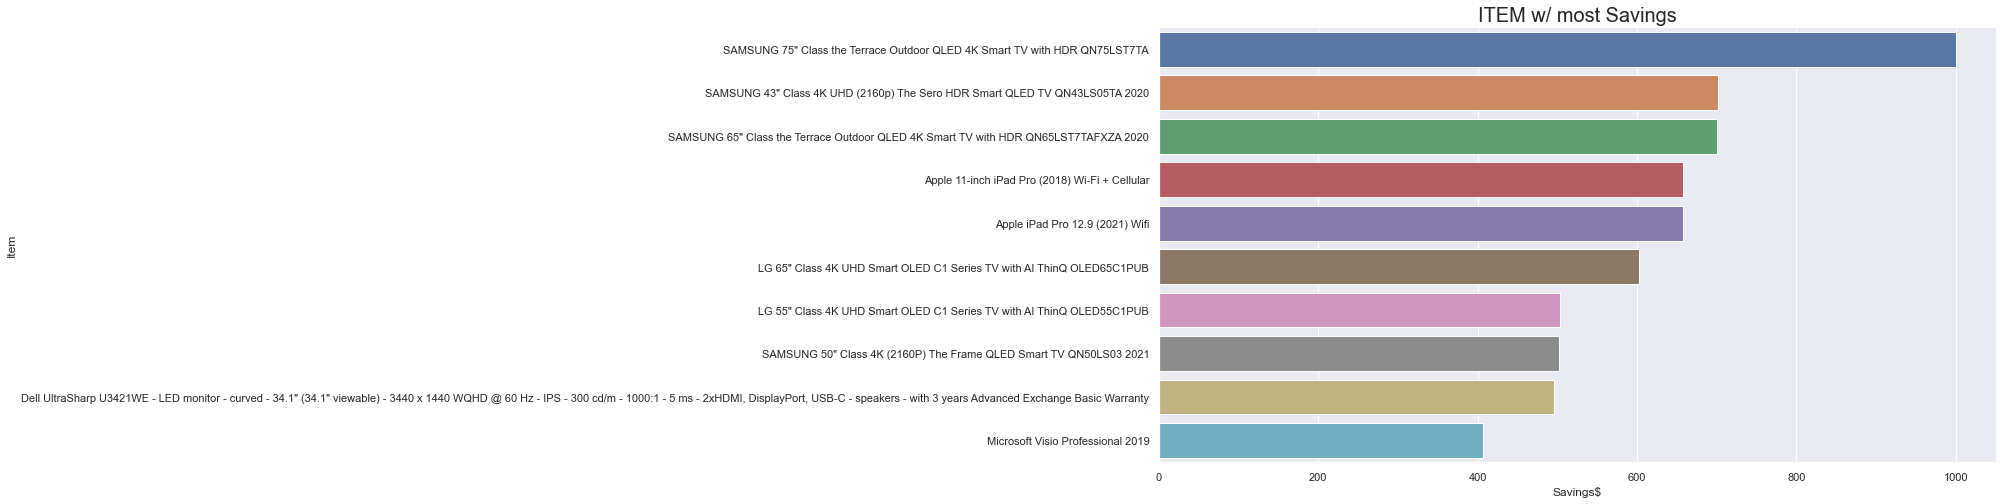

In [40]:
fig, ax = plt.subplots(figsize = (15,8))
barchart = sns.barplot(data = item_max_saving[:10], x = 'Savings$', y = "Item")  
plt.title('ITEM w/ most Savings', fontsize= 20)
fig.savefig('.\output\items_most_savings.png', bbox_inches='tight')

# Product category with most total savings

In [37]:
# Max product category Savings
max_category_savings = df.groupby('productCategory')['Savings$'].sum().reset_index().sort_values(by='Savings$', ascending=False)[:10]
max_category_savings

,productCategory,Savings$
42,Televisions,4460.95
23,Laptop Computers,3488.91
8,Computer Monitors,2434.19
41,Tablet Computers,1971.12
4,Cell Phones,1679.68
31,Network Routers,950.79
37,Sound Bars,806.18
39,Surveillance Cameras,675.53
9,Computer Software,660.62
33,Portable Speakers,600.99


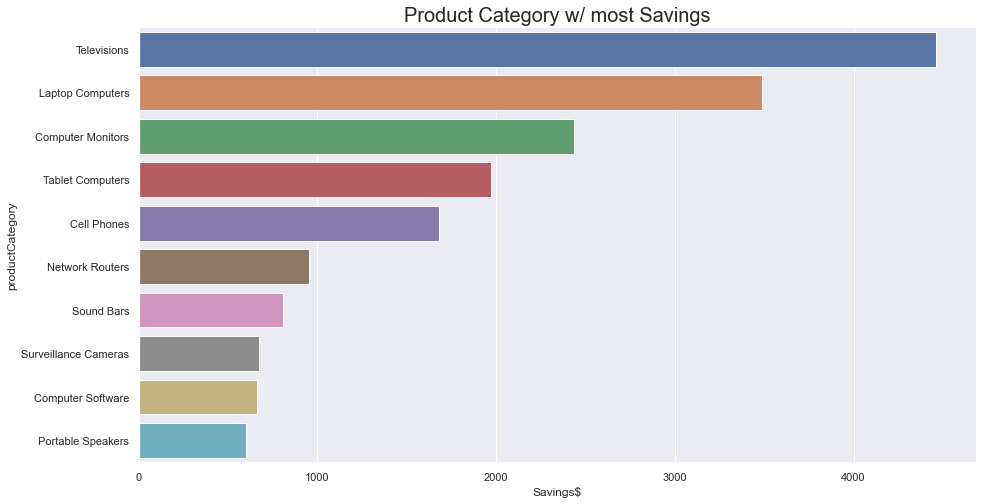

In [41]:
fig, ax = plt.subplots(figsize = (15,8))
barchart = sns.barplot(data = max_category_savings, x = 'Savings$', y = 'productCategory')    
plt.title('Product Category w/ most Savings', fontsize= 20)
fig.savefig('.\output\Productcategory_most_savings.png', bbox_inches='tight')

# Savings per Product Category average

In [44]:
# Avg category Savings
avg_category_savings = round(df.groupby('productCategory')['Savings$'].mean().reset_index().sort_values(by='Savings$', ascending=False)[:10], 2)
avg_category_savings

,productCategory,Savings$
42,Televisions,405.54
34,Processors,279.01
9,Computer Software,165.16
44,Video Projectors,137.00
41,Tablet Computers,115.95
23,Laptop Computers,109.03
27,Mini Projectors,100.99
8,Computer Monitors,97.37
4,Cell Phones,88.40
0,Aerial Drones,86.16


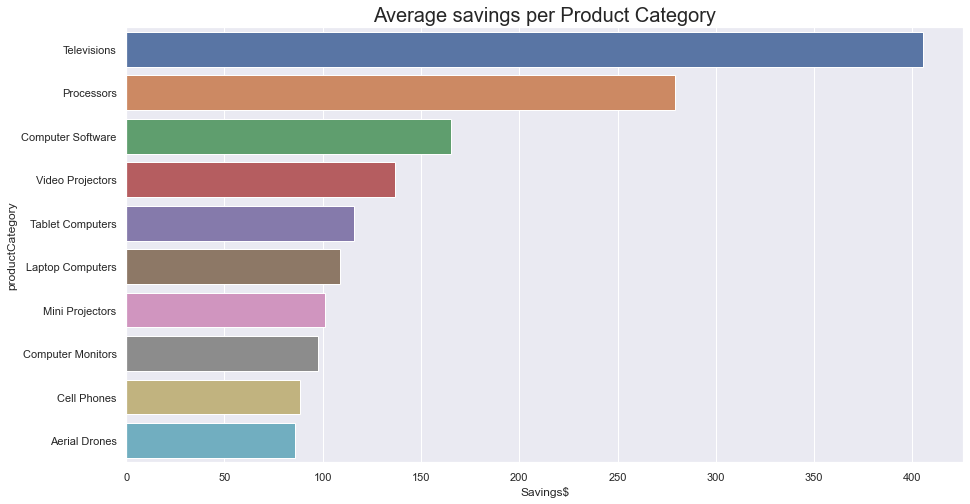

In [45]:
fig, ax = plt.subplots(figsize = (15,8))
barchart = sns.barplot(data = avg_category_savings, x = 'Savings$', y = 'productCategory') 
plt.title('Average savings per Product Category', fontsize= 20)
fig.savefig('.\output\Productcategory_average_savings.png', bbox_inches='tight')

# Number of items on sale per product category

In [48]:
# Items per category
items_per_cat = df.groupby('productCategory')['Item'].count().reset_index().sort_values(by='Item', ascending=False)[:10]
items_per_cat

,productCategory,Item
23,Laptop Computers,32
8,Computer Monitors,25
31,Network Routers,22
4,Cell Phones,19
41,Tablet Computers,17
16,Hard Drives,16
42,Televisions,11
37,Sound Bars,11
18,Headphones,11
33,Portable Speakers,10


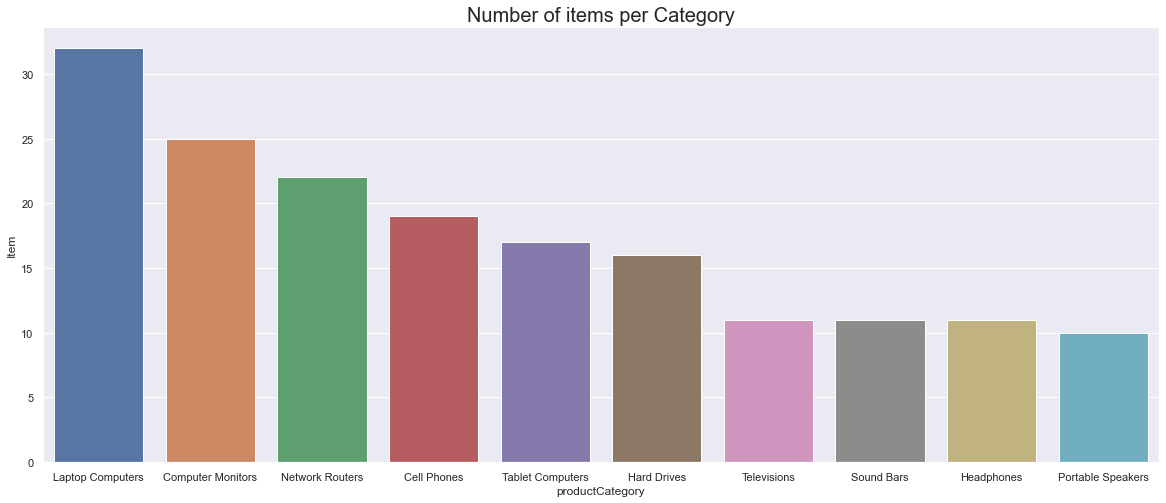

In [47]:
fig, ax = plt.subplots(figsize = (20,8))
barchart = sns.barplot(data = items_per_cat, x = 'productCategory', y = 'Item') 
plt.title('Number of items per Category', fontsize= 20)
fig.savefig('.\output\Productcategory_average_savings2.png', bbox_inches='tight')

# Save df to SQL database

In [49]:
import getpass
import pymysql
from sqlalchemy import create_engine, inspect

In [56]:
username = 'root'
database = 'walmart'
password = getpass.getpass()
server = 'localhost'

········


In [57]:
engine = create_engine(f'mysql+pymysql://{username}:{password}@{server}/{database}')

In [58]:
# Save df to sql database.
df.to_sql('items', engine, index=False, if_exists='replace')